# Praticando ETL

## Bibliotecas utilizadas.

In [1]:
#Importando as bibliotecas.
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 📌 Fazendo a Extração (E - Extract)

- ✅ Carregar os dados diretamente da API utilizando Python.
- ✅ Converter os dados para um DataFrame do Pandas para facilitar a manipulação.

In [2]:
#Extraindo dados.
Dados ='https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(Dados)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Fazendo uma copia para manipulação dos dados sem alterar o principal.

In [3]:
dados_usuarios = df.copy()

###  Fazendo a Tabulação dos dados.

In [4]:

dados_usuarios = requests.get(Dados)
resultado = json.loads(dados_usuarios.text)
df_normalizado = pd.json_normalize(resultado)
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 🔧 Fazendo a parte de Transformação (T - Transform)
- ✅ Explorar as colunas do dataset e verificar seus tipos de dados.
- ✅ Identificar as colunas mais relevantes para a análise de evasão.
- ✅ Neste passo, verifiquei se há problemas nos dados que possam afetar a análise. Foquei em observar  valores ausentes, duplicados, erros de formatação e inconsistências nas categorias. Com esse processo realizado consigo garantir que os dados estejam prontos para as próximas etapas.

In [5]:
#Observando os tipos de dados existente.
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#### Dicionário dos dados obtidos.

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

### Renomeando as colunas existentes.

In [6]:
# Dicionário de renomeação
novos_nomes = {
    'customerID': 'id_cliente',
    'Churn': 'evasao',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'idoso',
    'customer.Partner': 'tem_parceiro',
    'customer.Dependents': 'tem_dependentes',
    'customer.tenure': 'meses_contrato',
    'phone.PhoneService': 'servico_telefone',
    'phone.MultipleLines': 'varias_linhas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguranca_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'protecao_dispositivo',
    'internet.TechSupport': 'suporte_tecnico',
    'internet.StreamingTV': 'tv_streaming',
    'internet.StreamingMovies': 'filmes_streaming',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'fatura_online',
    'account.PaymentMethod': 'metodo_pagamento',
    'account.Charges.Monthly': 'gasto_mensal',
    'account.Charges.Total': 'gasto_total'
}

# Aplicar renomeação
df_normalizado.rename(columns=novos_nomes, inplace=True)

# Verificar resultado
print(df_normalizado.columns)

Index(['id_cliente', 'evasao', 'genero', 'idoso', 'tem_parceiro',
       'tem_dependentes', 'meses_contrato', 'servico_telefone',
       'varias_linhas', 'tipo_internet', 'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming',
       'filmes_streaming', 'tipo_contrato', 'fatura_online',
       'metodo_pagamento', 'gasto_mensal', 'gasto_total'],
      dtype='object')


- Observando se há valores ausentes dentro das linhas de cada coluna.

In [7]:
# Identificar strings vazias em todas as colunas
print("Contagem de strings vazias por coluna:")
for col in df_normalizado.columns:
    contagem_strings_vazias = (df_normalizado[col] == '').sum()
    if contagem_strings_vazias > 0:
        print(f"Coluna '{col}': {contagem_strings_vazias} strings vazias")
    else:
        print(f"Coluna '{col}': Nenhuma string vazia")

Contagem de strings vazias por coluna:
Coluna 'id_cliente': Nenhuma string vazia
Coluna 'evasao': 224 strings vazias
Coluna 'genero': Nenhuma string vazia
Coluna 'idoso': Nenhuma string vazia
Coluna 'tem_parceiro': Nenhuma string vazia
Coluna 'tem_dependentes': Nenhuma string vazia
Coluna 'meses_contrato': Nenhuma string vazia
Coluna 'servico_telefone': Nenhuma string vazia
Coluna 'varias_linhas': Nenhuma string vazia
Coluna 'tipo_internet': Nenhuma string vazia
Coluna 'seguranca_online': Nenhuma string vazia
Coluna 'backup_online': Nenhuma string vazia
Coluna 'protecao_dispositivo': Nenhuma string vazia
Coluna 'suporte_tecnico': Nenhuma string vazia
Coluna 'tv_streaming': Nenhuma string vazia
Coluna 'filmes_streaming': Nenhuma string vazia
Coluna 'tipo_contrato': Nenhuma string vazia
Coluna 'fatura_online': Nenhuma string vazia
Coluna 'metodo_pagamento': Nenhuma string vazia
Coluna 'gasto_mensal': Nenhuma string vazia
Coluna 'gasto_total': Nenhuma string vazia


- Precebemos que há 224 linhas vazias em "evasao", precisando de ser removidas, para melhor analise dos dados.

In [8]:
print("Contagem de valores na coluna 'evasao':\n")
print(df_normalizado['evasao'].value_counts())

#Removendo as linhas vazias que existe na coluna.
df_normalizado = df_normalizado[df_normalizado['evasao'] != '']


# Verificar se ainda existem strings vazias (deve ser 0)
contagem_strings_vazias_apos = (df_normalizado['evasao'] == '').sum()
print(f"\nTotal de strings vazias na coluna 'evasao' após remoção: {contagem_strings_vazias_apos}")

Contagem de valores na coluna 'evasao':

evasao
No     5174
Yes    1869
        224
Name: count, dtype: int64



Total de strings vazias na coluna 'evasao' após remoção: 0


### Padronização e Transformação de Dados

In [9]:
#Remover customerID (não é útil para análise preditiva).
df_normalizado.drop("id_cliente", axis=1, inplace=True)

In [10]:
# Observando os tipos ds dados onde as colunas são do tipos objeto.(Dificultando Futuramente a analise.)
df_normalizado.select_dtypes(include='object')

,evasao,genero,tem_parceiro,tem_dependentes,servico_telefone,varias_linhas,tipo_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,metodo_pagamento,gasto_total
0,No,Female,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,593.3
1,No,Male,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,542.4
2,Yes,Male,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,280.85
3,Yes,Male,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1237.85
4,Yes,Female,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,742.9
7263,Yes,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,1873.7
7264,No,Male,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,92.75
7265,No,Male,Yes,Yes,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,4627.65


In [11]:
#Alterando o tipo de dado da coluna gasto_total, para int.
df_normalizado['gasto_total'] = pd.to_numeric(df_normalizado['gasto_total'], errors='coerce')
# Se caso precisar, preencher os dados com valores desejado.
# Preencha os valores ausentes criados pela coerção (por exemplo, com 0 ou a média)
df_normalizado.fillna({'gasto_total': 0}, inplace=True)

In [12]:
#Criando a coluna "Contas_Diarias".Utilizado para ajudar na analise dos clientes.
df_normalizado['Valor_Contas_Por_Dia'] = df_normalizado['gasto_mensal'] / 30

In [13]:
print(df_normalizado['Valor_Contas_Por_Dia'])


0       2.186667
1       1.996667
2       2.463333
3       3.266667
4       2.796667
          ...   
7262    1.838333
7263    2.836667
7264    1.676667
7265    2.261667
7266    1.966667
Name: Valor_Contas_Por_Dia, Length: 7043, dtype: float64


### 📊 Carga e Análise (L - Load & Analysis)
### Análise Descritiva

-  Para começar, realize uma análise descritiva dos dados, calculando métricas como média,
mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.


In [14]:
#Analisando só as colunas que nao sao binarias.
columns = ['Valor_Contas_Por_Dia','gasto_mensal','gasto_total','meses_contrato']
df_normalizado[columns].describe()

,Valor_Contas_Por_Dia,gasto_mensal,gasto_total,meses_contrato
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.158723,64.761692,2279.734304,32.371149
std,1.003002,30.090047,2266.794470,24.559481
min,0.608333,18.250000,0.000000,0.000000
25%,1.183333,35.500000,398.550000,9.000000
50%,2.345000,70.350000,1394.550000,29.000000
75%,2.995000,89.850000,3786.600000,55.000000
max,3.958333,118.750000,8684.800000,72.000000


- ### Calculando a porcentagem de clientes que saiu. Distribuição da Evasão.

In [15]:
# calculando a porcentagem de sim e nao
Calculo_Porcen_Evasao =  (round(df_normalizado['evasao'].value_counts(normalize=True) * 100, 2))

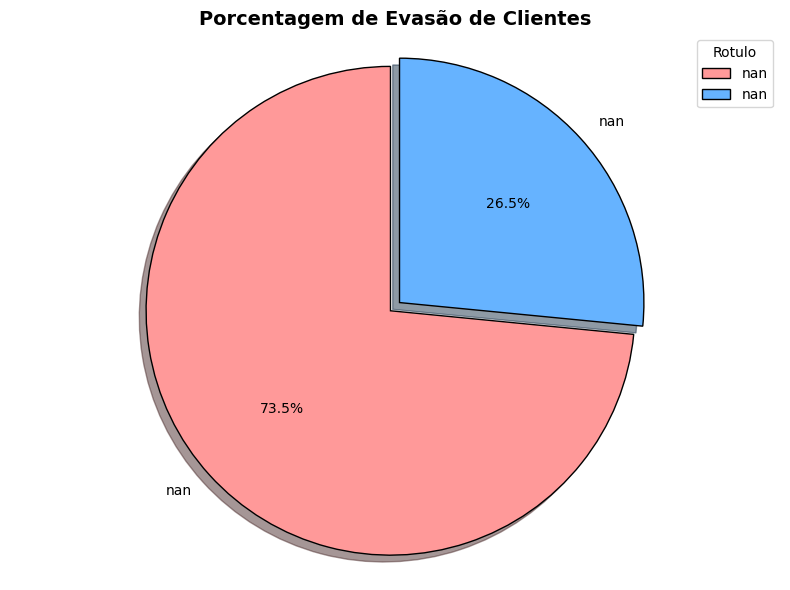

In [16]:
# Criar um dicionário de mapeamento
mapa_rotulos = {1: 'Sim', 0: 'Não'}

# Substituir os índices numéricos por texto
rotulos = Calculo_Porcen_Evasao.index.map(mapa_rotulos)

# Gráfico
plt.figure(figsize=(8, 6))
plt.pie(
    Calculo_Porcen_Evasao,
    labels=rotulos,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff'],
    explode=(0.05, 0),
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

# Título principal
plt.title('Porcentagem de Evasão de Clientes', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.legend(title="Rotulo", loc="upper right")

plt.tight_layout()
plt.show()


- ### Agora, vamos explorar como a evasão se distribui de acordo com as variáveis categóricas,  método de pagamento , tipo de contrato e gênero.

In [17]:
# Traduzindo coluna de metodo de pagamento
novos_nomes_pagamento = {
    'Electronic check': 'Cheque/Eletronico',
    'Mailed check': 'Cheque/Correio.',
    'Bank transfer (automatic)': 'Transferencia/(Automatico)',
    'Credit card (automatic)': 'Cartao_Credito(Automatico)'
}

# rENOMEANDO OS METODOS DE PAGAMENTO
df_normalizado['metodo_pagamento'] = df_normalizado['metodo_pagamento'].replace(novos_nomes_pagamento)

In [18]:
# Obtendo cada metodo de pagamento.
Metodos_utilizados = df_normalizado['metodo_pagamento'].value_counts()

# Obtendo o total de ocorrencias que a dentro das duas principais formas de pagamento.
top2_sum = Metodos_utilizados.iloc[:2].sum()

# Obtendo o total de clientes.
total_clientes = Metodos_utilizados.sum()

#Calculando a porcentagem dos principais metodos de pagamento.
percentual = (top2_sum / total_clientes) * 100


In [19]:
percentual

56.467414454067864

In [20]:
Metodos_utilizados

metodo_pagamento
Cheque/Eletronico             2365
Cheque/Correio.               1612
Transferencia/(Automatico)    1544
Cartao_Credito(Automatico)    1522
Name: count, dtype: int64

In [21]:
print(f'Os dois principais metodos de pagamento corresponde por {percentual:.1f}% das compras realizadas..')

Os dois principais metodos de pagamento corresponde por 56.5% das compras realizadas..


- ### Fazendo uma copia para criação de graficos, sem alterar os dados original.

In [22]:
#Fazendo uma copia de seguranca para criar os graficos.
df_plot = df_normalizado.copy()

In [23]:
# Converter colunas binárias para 0 e 1
binary_colums = ['evasao', 'tem_parceiro', 'tem_dependentes', 'servico_telefone',  'seguranca_online', 'fatura_online','varias_linhas','backup_online','protecao_dispositivo','suporte_tecnico','tv_streaming','filmes_streaming']
for col in binary_colums:
    df_plot[col] = df_plot[col].map({'Yes': 1, 'No': 0})


# Exibir as primeiras linhas para verificar a mudança
display(df_normalizado.head(3))

,evasao,genero,idoso,tem_parceiro,tem_dependentes,meses_contrato,servico_telefone,varias_linhas,tipo_internet,seguranca_online,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,metodo_pagamento,gasto_mensal,gasto_total,Valor_Contas_Por_Dia
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Cheque/Correio.,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Cheque/Correio.,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Cheque/Eletronico,73.9,280.85,2.463333


- Criando uma função para criar os graficos desejados.

In [24]:
# Cores da identidade visual.
CINZA_1 = "#E6E6E6"
VERMELHO_1 = "#FF4D4F"  # Evasão: Sim
AZUL_1 = "#66b3ff"      # Evasão: Não
CINZA_5 = "#555555"


# Função reutilizável para criar os graficos desejados.
# Grafico de barras para a distribuição de evasão por uma coluna categórica.
def plot_evasao_categorica(df, coluna, titulo=None):
    plt.figure(figsize=(10, 6), facecolor=CINZA_1)
    ax = sns.countplot(
        data=df,
        x=coluna,
        hue='evasao',
        palette=[AZUL_1, VERMELHO_1]
    )

    # Estilo do fundo
    ax.set_facecolor(CINZA_1)

    # Título
    if titulo is None:
        titulo = f'Evasão por {coluna.replace("_", " ").title()}'
    ax.set_title(titulo, fontsize=16, color=CINZA_5, pad=15)

    # Eixo X
    ax.set_xlabel(coluna.replace('_', ' ').title(), fontsize=12, color=AZUL_1)
    ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)

    # Eixo Y (removido)
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.tick_params(axis='y', left=False)

    # Remover bordas
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)

    # Legenda
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles,
        ['Não', 'Sim'],
        title='Evasão',
        loc='upper right',
        fontsize=11,
        title_fontsize=11
    )

    # Rótulos nas barras
    for container in ax.containers:
        ax.bar_label(container, fontsize=11, color=AZUL_1, label_type='edge', padding=3)

    plt.tight_layout()
    plt.show()

##############################################################
#Funcao para grafico de barras empilhada.

def plot_evasao_empilhada(df, coluna, titulo=None):
    # Agrupa os dados para contar a evasão por categoria
    dados = df.groupby([coluna, 'evasao']).size().unstack(fill_value=0)

    # Ordena os índices.
    dados = dados.sort_index()

    # Definindo as cores
    AZUL_1 = "#66b3ff"     # Não evadido
    VERMELHO_1 = "#ff4d4f" # Evadido
    CINZA_1 = "#E6E6E6"
    CINZA_5 = "#555555"

    # Cria o gráfico desejado.
    plt.figure(figsize=(10, 6), facecolor=CINZA_1)
    ax = plt.gca()
    ax.set_facecolor(CINZA_1)

    # Gráfico de barras empilhadas
    dados[0].plot(kind='bar', stacked=True, color=AZUL_1, ax=ax, label='Não')
    dados[1].plot(kind='bar', stacked=True, color=VERMELHO_1, ax=ax, bottom=dados[0], label='Sim')

    # Título
    if titulo is None:
        titulo = f'Evasão por {coluna.replace("_", " ").title()}'
    plt.title(titulo, fontsize=18, color=CINZA_5)

    # Estilo dos eixos
    plt.xticks(rotation=0, fontsize=12, color=AZUL_1)
    plt.yticks([])
    plt.xlabel(coluna.replace('_', ' ').title(), fontsize=12, color=AZUL_1)
    plt.ylabel('')
    ax.spines[['top', 'right', 'left']].set_visible(False)

    # Adiciona os totais nas barras
    for i, (v1, v2) in enumerate(zip(dados[0], dados[1])):
        plt.text(i, v1 / 2, str(v1), ha='center', va='center', color='white', fontsize=11)
        plt.text(i, v1 + v2 / 2, str(v2), ha='center', va='center', color='white', fontsize=11)

    # Legenda
    plt.legend(title='Evasão', loc='upper right', fontsize=11, title_fontsize=11)

    plt.tight_layout()
    plt.show()

###########################################################################################3
def evasao_linha(df, coluna, titulo=None):
    # Agrupa os dados para contar a evasão por categoria
    dados = df.groupby([coluna, 'evasao']).size().unstack(fill_value=0)
    dados = dados.sort_index()

    # Definindo as cores
    AZUL_1 = "#66b3ff"     # Não evadido
    VERMELHO_1 = "#ff4d4f" # Evadido
    CINZA_1 = "#E6E6E6"
    CINZA_5 = "#555555"

    plt.figure(figsize=(10, 6), facecolor=CINZA_1)
    ax = plt.gca()
    ax.set_facecolor(CINZA_1)

    # Gráfico de linha
    dados[0].plot(kind='line', marker='o', color=AZUL_1, ax=ax, label='Não')
    dados[1].plot(kind='line', marker='o', color=VERMELHO_1, ax=ax, label='Sim')

    if titulo is None:
        titulo = f'Evasão por {coluna.replace("_", " ").title()}'
    plt.title(titulo, fontsize=18, color=CINZA_5)

    plt.xticks(rotation=0, fontsize=12, color=AZUL_1)
    plt.yticks([])
    plt.xlabel(coluna.replace('_', ' ').title(), fontsize=12, color=AZUL_1)
    plt.ylabel('')
    ax.spines[['top', 'right', 'left']].set_visible(False)


    for i, (v1, v2) in enumerate(zip(dados[0], dados[1])):
        plt.text(i, v1 + max(dados[0].max(), dados[1].max())*0.03, str(v1), 
                 ha='center', va='bottom', color=AZUL_1, fontsize=11, fontweight='bold')
        plt.text(i, v2 + max(dados[0].max(), dados[1].max())*0.03, str(v2), 
                 ha='center', va='bottom', color=VERMELHO_1, fontsize=11, fontweight='bold')

    plt.legend(title='Evasão', loc='upper right', fontsize=11, title_fontsize=11)
    plt.tight_layout()
    plt.show()





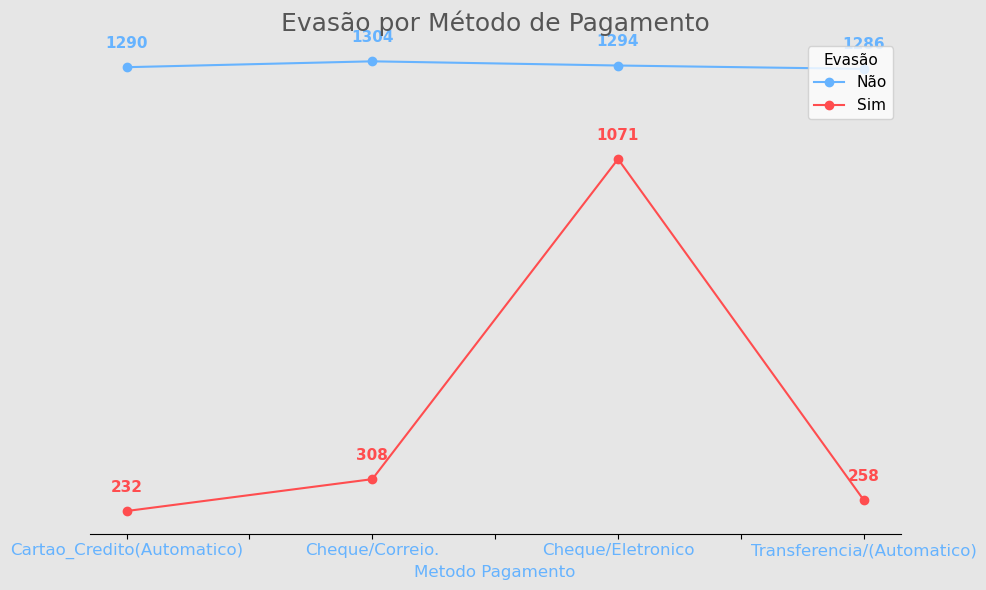

In [25]:
evasao_linha(df_plot, 'metodo_pagamento', titulo='Evasão por Método de Pagamento')

- ### Observando a saida dos clientes por metodo de pagamento.


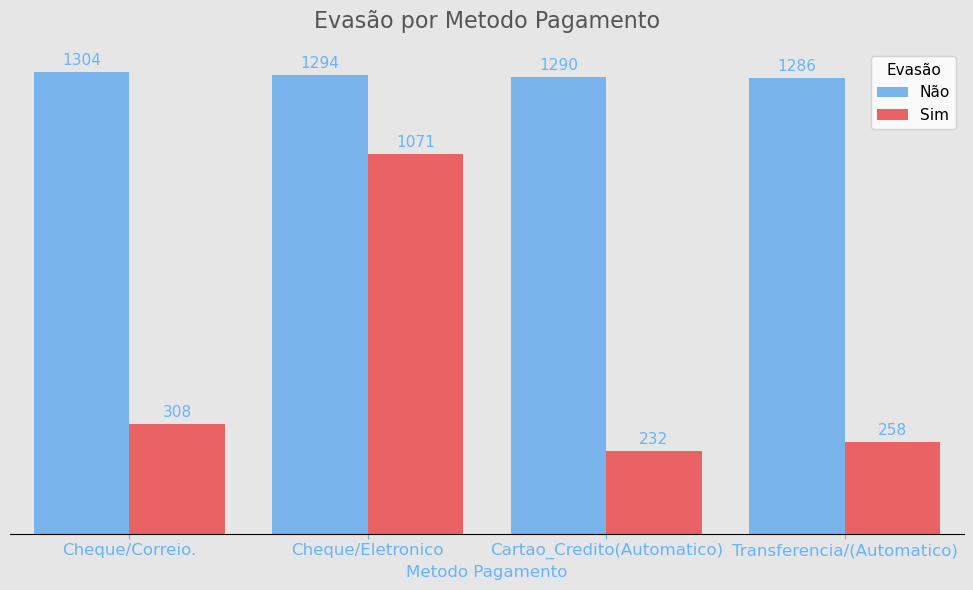

In [26]:
plot_evasao_categorica(df_plot, 'metodo_pagamento')

- ### Observando a saida dos clientes por Genero.
 

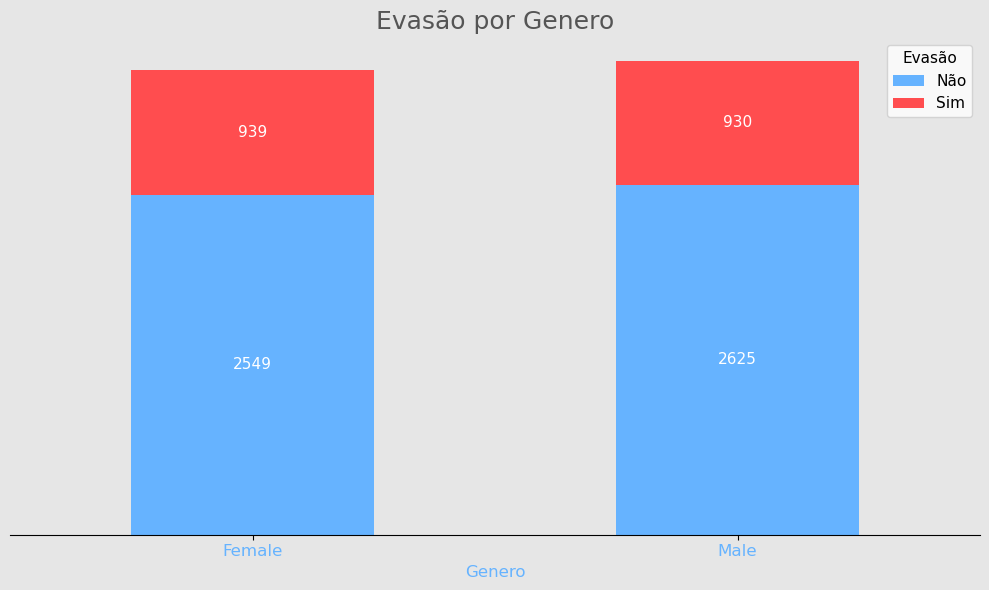

In [27]:
plot_evasao_empilhada(df_plot, 'genero')

- ### Observando a saida dos clientes pelo tipo de contrato

`One year` : 1 ano. 
`Month-to-month` : Mês a Mês.
`Two-year` : 2 Anos 


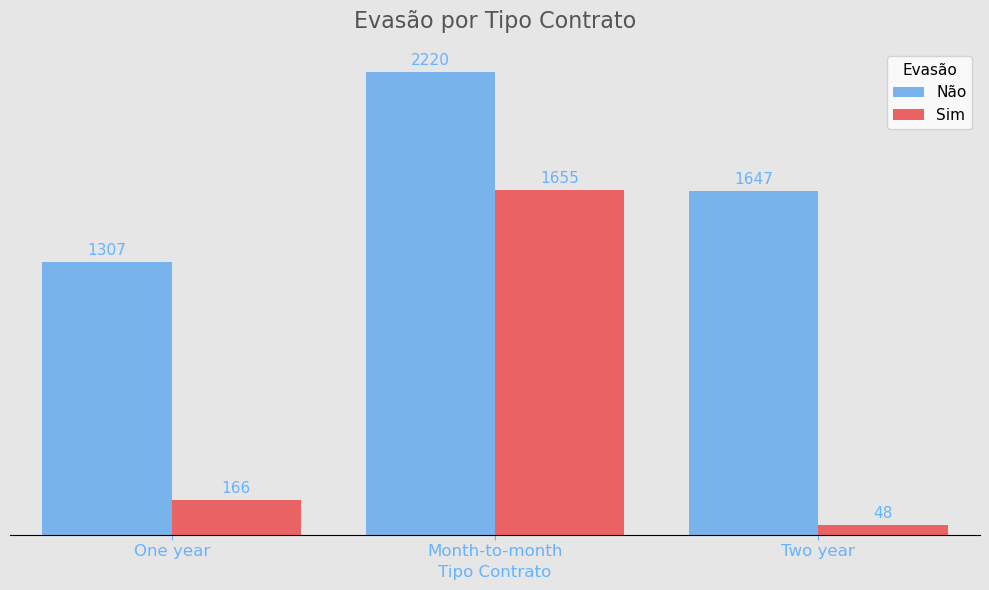

In [28]:
plot_evasao_categorica(df_plot, 'tipo_contrato')

- ### Observando a Distribuição do Gasto Mensal por [Evasão].

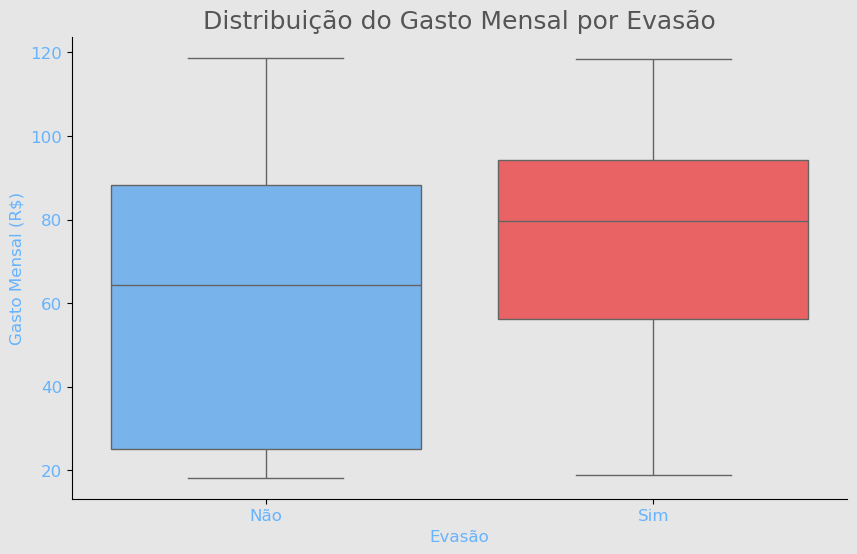

In [29]:
# voltando com os rotulos da evasao para melhor visualizacao
df_plot['evasao'] = df_plot['evasao'].map({0: 'Não', 1: 'Sim'})

# Criar figura
plt.figure(figsize=(10, 6), facecolor=CINZA_1)
ax = plt.gca()
ax.set_facecolor(CINZA_1)

# Criando o grafico.
sns.boxplot(data=df_plot, x='evasao', y='gasto_mensal', hue='evasao', palette={'Não': AZUL_1, 'Sim': VERMELHO_1}, legend=False)

# Estilo
plt.title('Distribuição do Gasto Mensal por Evasão', fontsize=18, color=CINZA_5)
plt.xlabel('Evasão', fontsize=12, color=AZUL_1)
plt.ylabel('Gasto Mensal (R$)', fontsize=12, color=AZUL_1)
plt.xticks(fontsize=12, color=AZUL_1)
plt.yticks(fontsize=12, color=AZUL_1)
ax.spines[['top', 'right']].set_visible(False)

plt.show()


In [30]:
#Colocando os meses de contrato em meses do anos com 12 meses cadaa ano.
df_plot['meses_contrato'] = df_plot['meses_contrato'] / 12

In [31]:
# Agrupar os dados pela média de gasto mensal por tempo de contrato 
df_plot['meses_contrato'] = df_plot['meses_contrato'].astype(int)  # Garantir que seja do tipo int
df_plot['gasto_mensal'] = df_plot['gasto_mensal'].astype(float)  # Garantir que seja do tipo float
gasto_mensal_por_tempo = df_plot.groupby('meses_contrato')['gasto_mensal'].mean().reset_index()

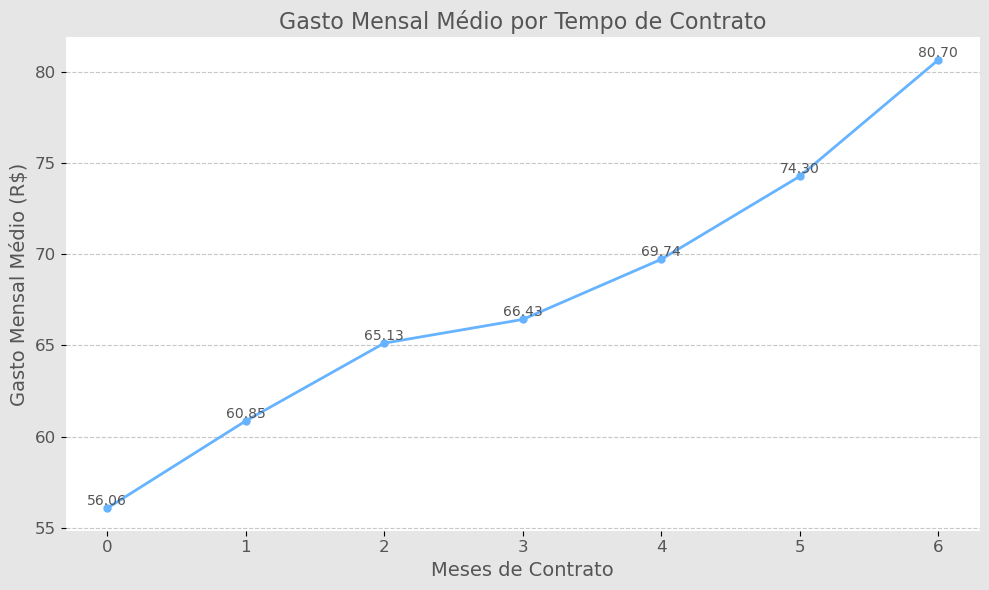

In [32]:
# Criar o gráfico de linha
plt.figure(figsize=(10, 6), facecolor=CINZA_1)
plt.plot(gasto_mensal_por_tempo['meses_contrato'], gasto_mensal_por_tempo['gasto_mensal'], marker='o', color=AZUL_1, linestyle='-', linewidth=2, markersize=5)
plt.title('Gasto Mensal Médio por Tempo de Contrato', fontsize=16, color=CINZA_5)
plt.xlabel('Meses de Contrato', fontsize=14, color=CINZA_5)
plt.ylabel('Gasto Mensal Médio (R$)', fontsize=14, color=CINZA_5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#Colocando os rótulos em cima de cada ponto da linha
for i, row in gasto_mensal_por_tempo.iterrows():
    plt.text(row['meses_contrato'], row['gasto_mensal'], f'{row["gasto_mensal"]:.2f}', fontsize=10, color=CINZA_5, ha='center', va='bottom')    
#Excluindo os rotulos do grafico do lado esquerdo e direito.
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xticks(fontsize=12, color=CINZA_5)
plt.yticks(fontsize=12, color=CINZA_5)
plt.tight_layout()
plt.show()


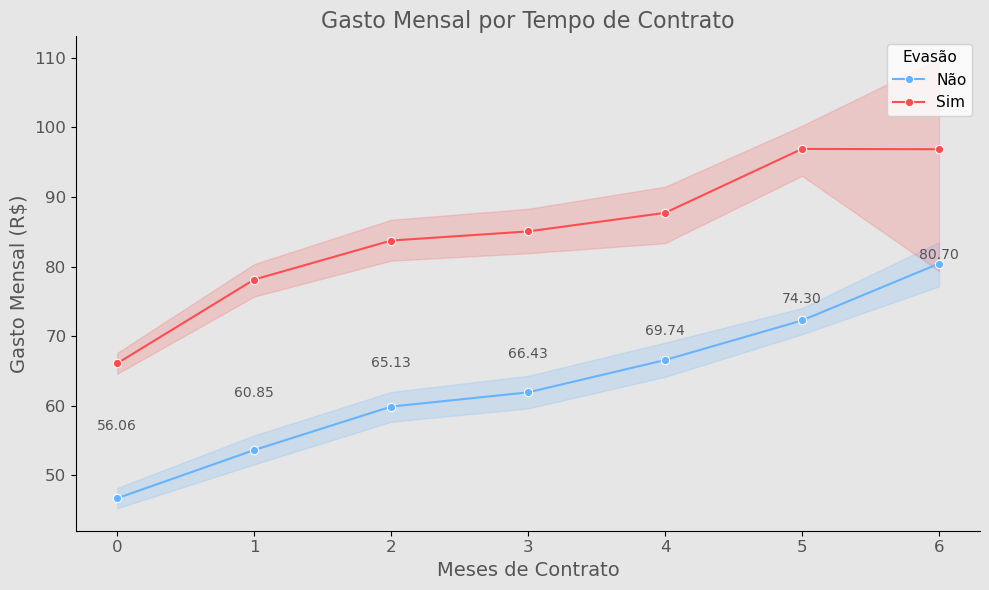

In [33]:
# Criar figura de grafico de linha por tempo de contrato
plt.figure(figsize=(10, 6), facecolor=CINZA_1)
ax = plt.gca()
ax.set_facecolor(CINZA_1)
# Criando o gráfico de linha para meses_contrato
sns.lineplot(data=df_plot, x='meses_contrato', y='gasto_mensal', hue='evasao', palette={'Não': AZUL_1, 'Sim': VERMELHO_1}, marker='o')
plt.title('Gasto Mensal por Tempo de Contrato', fontsize=16, color=CINZA_5)
plt.xlabel('Meses de Contrato', fontsize=14, color=CINZA_5)
plt.ylabel('Gasto Mensal (R$)', fontsize=14, color=CINZA_5)
plt.xticks(fontsize=12, color=CINZA_5)
#Colocando os rótulos em cima de cada ponto da linha
for i, row in gasto_mensal_por_tempo.iterrows():
    plt.text(row['meses_contrato'], row['gasto_mensal'], f'{row["gasto_mensal"]:.2f}', fontsize=10, color=CINZA_5, ha='center', va='bottom')

plt.yticks(fontsize=12, color=CINZA_5)
ax.spines[['top', 'right']].set_visible(False)
plt.legend(title='Evasão', loc='upper right', fontsize=11, title_fontsize=11)
plt.tight_layout()
plt.show()

- Dei ênfase nos valores dos clientes que nao sairam da empresa, mostrando uma tendência de aumento ao longo dos anos de contrato.   

In [34]:
# Excluindo todas as linhas que estao faltando.
df_plot.dropna(inplace=True)

In [35]:
df_normalizado.to_csv('TelecomX_dados_lipo.csv', index=False)
print("Arquivo 'TelecomX_Data_Tratado.csv' salvo com sucesso!")

Arquivo 'TelecomX_Data_Tratado.csv' salvo com sucesso!
